In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [2]:
dataset_train = pd.read_csv('train.csv')
dataset_train.head()

ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9

In [3]:
dataset_test = pd.read_csv('test.csv')

In [4]:
dataset_test.head()

ID     crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0   3  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
1   6  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
2   8  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
3   9  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
4  10  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   

   ptratio   black  lstat  
0     17.8  392.83   4.03  
1     18.7  394.12   5.21  
2     15.2  396.90  19.15  
3     15.2  386.63  29.93  
4     15.2  386.71  17.10

In [5]:
#outlier_detection
from collections import Counter
def detect_outlier(df, n, features):
    outlier_indices = []
    
    for col in features:
        #1st quartile
        Q1 = np.percentile(df[col], 25)
        
        #3rd quartile
        Q3 = np.percentile(df[col], 75)
        
        #IQR
        IQR = Q3 - Q1
        
        #outlier_step
        outlier_step = 1.5 * IQR
        
        outlier_list_index = df[(df[col]<Q1-outlier_step )|(df[col]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_index)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v > n)
    return multiple_outliers

outiers_to_drop = detect_outlier(dataset_train, 2, ['age','black','crim','dis','indus','lstat','nox','ptratio','rm','tax','zn'])

In [6]:
dataset_train.loc[outiers_to_drop]

ID     crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
242  368  13.5222  0.0   18.1     0  0.631  3.863  100.0  1.5106   24  666   
253  385  20.0849  0.0   18.1     0  0.700  4.368   91.2  1.4395   24  666   
268  415  45.7461  0.0   18.1     0  0.693  4.519  100.0  1.6582   24  666   
248  375  18.4982  0.0   18.1     0  0.668  4.138  100.0  1.1370   24  666   

     ptratio   black  lstat  medv  
242     20.2  131.42  13.33  23.1  
253     20.2  285.83  30.63   8.8  
268     20.2   88.27  36.98   7.0  
248     20.2  396.90  37.97  13.8

In [7]:
dataset_train = dataset_train.drop(labels=outiers_to_drop, axis =0 ).reset_index(drop=True)

In [8]:
dataset = pd.concat(objs=[dataset_train, dataset_test], axis=0).reset_index(drop=True)

In [9]:
dataset.isnull().sum()

ID           0
age          0
black        0
chas         0
crim         0
dis          0
indus        0
lstat        0
medv       173
nox          0
ptratio      0
rad          0
rm           0
tax          0
zn           0
dtype: int64

In [10]:
dataset_train.shape

(329, 15)

In [11]:
dataset_test.shape

(173, 14)

In [12]:
dataset.shape

(502, 15)

In [13]:
dataset.head()

ID   age   black  chas     crim     dis  indus  lstat  medv    nox  \
0   1  65.2  396.90     0  0.00632  4.0900   2.31   4.98  24.0  0.538   
1   2  78.9  396.90     0  0.02731  4.9671   7.07   9.14  21.6  0.469   
2   4  45.8  394.63     0  0.03237  6.0622   2.18   2.94  33.4  0.458   
3   5  54.2  396.90     0  0.06905  6.0622   2.18   5.33  36.2  0.458   
4   7  66.6  395.60     0  0.08829  5.5605   7.87  12.43  22.9  0.524   

   ptratio  rad     rm  tax    zn  
0     15.3    1  6.575  296  18.0  
1     17.8    2  6.421  242   0.0  
2     18.7    3  6.998  222   0.0  
3     18.7    3  7.147  222   0.0  
4     15.2    5  6.012  311  12.5

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 15 columns):
ID         502 non-null int64
age        502 non-null float64
black      502 non-null float64
chas       502 non-null int64
crim       502 non-null float64
dis        502 non-null float64
indus      502 non-null float64
lstat      502 non-null float64
medv       329 non-null float64
nox        502 non-null float64
ptratio    502 non-null float64
rad        502 non-null int64
rm         502 non-null float64
tax        502 non-null int64
zn         502 non-null float64
dtypes: float64(11), int64(4)
memory usage: 58.9 KB


In [15]:
dataset.describe()

ID         age       black        chas        crim         dis  \
count  502.000000  502.000000  502.000000  502.000000  502.000000  502.000000   
mean   252.446215   68.342032  357.718406    0.069721    3.447393    3.813837   
std    146.307431   28.137078   90.232404    0.254930    8.356237    2.103415   
min      1.000000    2.900000    0.320000    0.000000    0.006320    1.129600   
25%    126.250000   44.550000  375.912500    0.000000    0.081900    2.107650   
50%    251.500000   76.950000  391.475000    0.000000    0.252775    3.239250   
75%    378.750000   93.900000  396.225000    0.000000    3.519827    5.213925   
max    506.000000  100.000000  396.900000    1.000000   88.976200   12.126500   

            indus       lstat        medv         nox     ptratio         rad  \
count  502.000000  502.000000  329.000000  502.000000  502.000000  502.000000   
mean    11.081295   12.517012   22.885410    0.553752   18.441633    9.434263   
std      6.859301    6.948152    9.141474    0.115829    2.167930    8.645298   
min      0.460000    1.730000    5.000000    0.385000   12.600000    1.000000   
25%      5.145000    6.922500   17.500000    0.449000   17.325000    4.000000   
50%      9.690000   11.300000   21.700000    0.538000   19.000000    5.000000   
75%     18.100000   16.860000   25.000000    0.624000   20.200000   24.000000   
max     27.740000   34.770000   50.000000    0.871000   22.000000   24.000000   

               rm         tax          zn  
count  502.000000  502.000000  502.000000  
mean     6.301070  406.183267   11.454183  
std      0.680356  167.621134   23.393170  
min      3.561000  187.000000    0.000000  
25%      5.888250  279.000000    0.000000  
50%      6.210000  330.000000    0.000000  
75%      6.628000  666.000000   12.500000  
max      8.780000  711.000000  100.000000

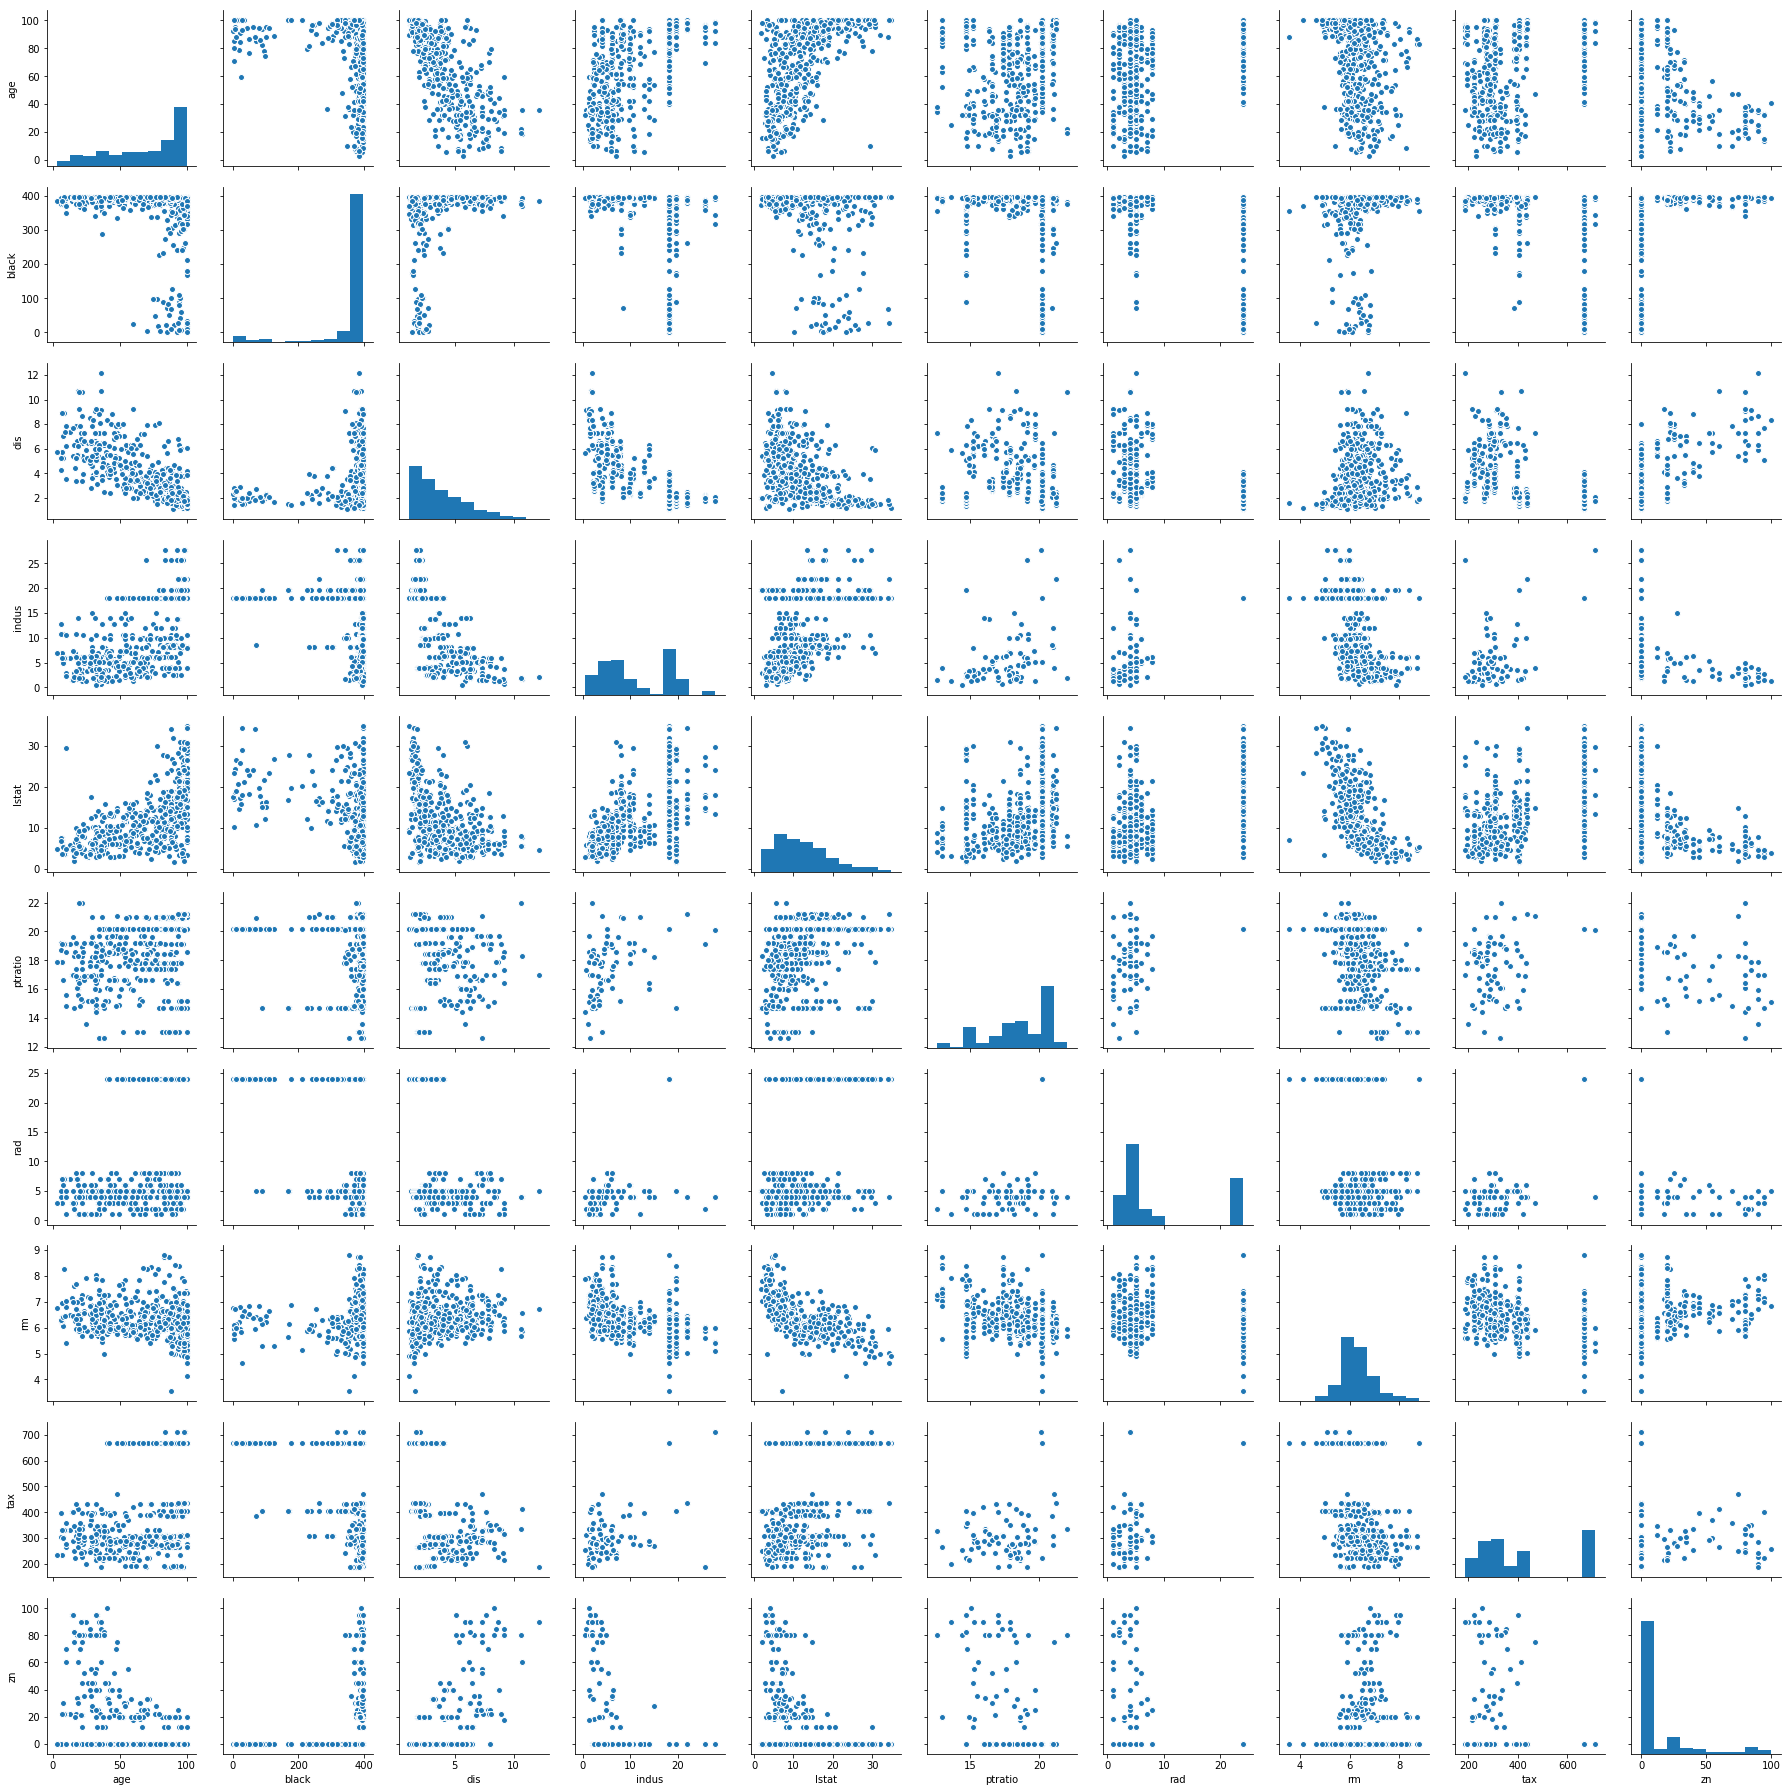

In [16]:
#Pairplot
sns.pairplot(dataset[['age','black','dis','indus','lstat','ptratio', 'rad','rm','tax','zn']])

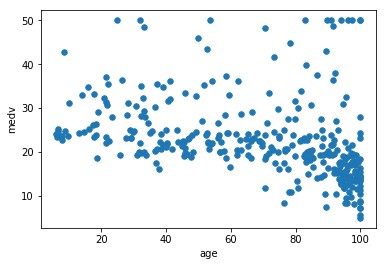

In [17]:
#Scatterplot 
dataset.plot.scatter(x='age', y='medv', s=30)

In [18]:
#correlation between age and medv
dataset['age'].corr(dataset['medv'])

-0.35166890006368834

from the above plot and the value we can see that there is a moderate negative correlation between these two variables

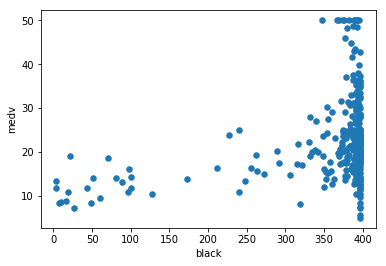

In [19]:
dataset.plot.scatter(x='black', y='medv', s=30)

In [20]:
dataset['black'].corr(dataset['medv'])

0.3298675071918325

From the above plot and the value we can see that there is a positive correlation between two variables

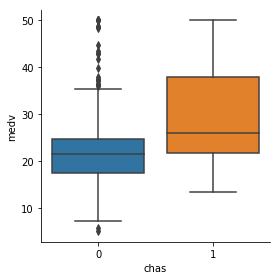

In [21]:
sns.factorplot(x='chas', y='medv',kind='box', data=dataset)

In [22]:
dataset['chas'].corr(dataset['medv'])

0.20318124573072552

From the above value we can see that there is a week positive correlation between two variables

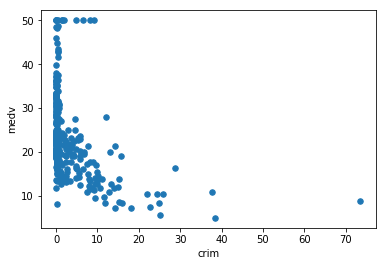

In [23]:
dataset.plot.scatter(x='crim', y='medv', s=30)

In [24]:
dataset['crim'].corr(dataset['medv'])

-0.3917756430927423

From the above graph and value we can see that there is a moderate negative correlation between these two variables

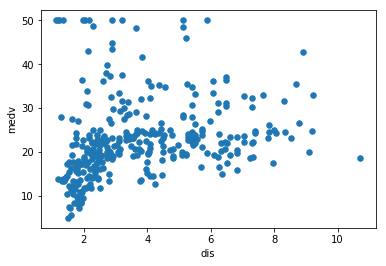

In [25]:
dataset.plot.scatter(x='dis', y='medv', s=30)

In [26]:
dataset['dis'].corr(dataset['medv'])

0.23912093793908057

From the above plot and value we can see that there is a weak correlation between these two variables

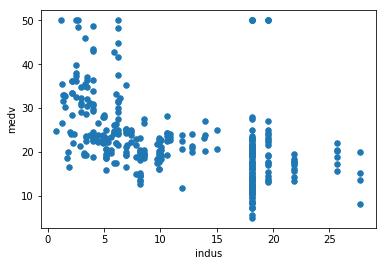

In [27]:
dataset.plot.scatter(x='indus', y='medv', s=30)

In [28]:
dataset['indus'].corr(dataset['medv'])

-0.4686696478812827

From the graph and value we can see that we have a strong negative correlation between these two variables

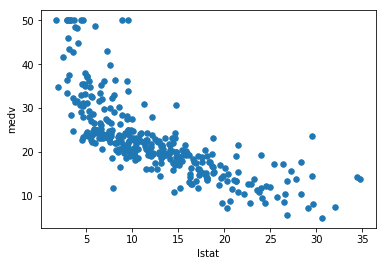

In [29]:
dataset.plot.scatter(x='lstat', y='medv', s=30)

In [30]:
dataset['lstat'].corr(dataset['medv'])

-0.7410679869051181

from the above plot and the value we can see that these two variables have strong negative correlation between them

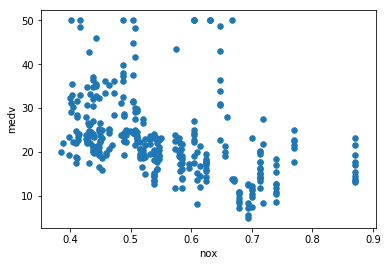

In [31]:
dataset.plot.scatter(x='nox', y='medv', s=30)

In [32]:
dataset['nox'].corr(dataset['medv'])

-0.4047851519631901

from the above plot and value we can see that there is a moderate negative correlation between them

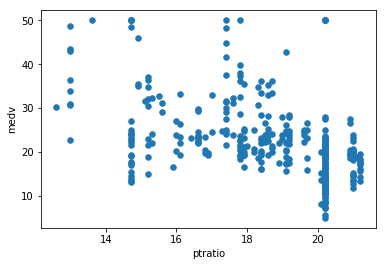

In [33]:
dataset.plot.scatter(x='ptratio', y='medv', s=30)

In [34]:
dataset['ptratio'].corr(dataset['medv'])

-0.47744776859253124

from the above plot and the value we can see that there is moderate negative correlation between these two variables

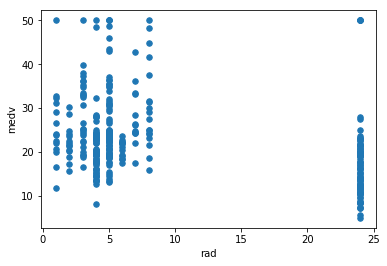

In [35]:
dataset.plot.scatter(x='rad', y='medv', s=30)

In [36]:
dataset['rad'].corr(dataset['medv'])

-0.34012052433827766

These two variables have moderate negative correlation between them

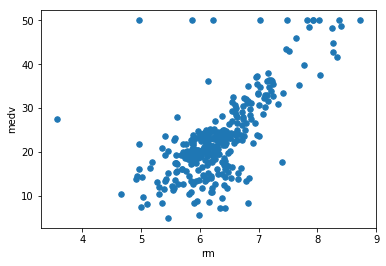

In [37]:
dataset.plot.scatter(x='rm', y='medv', s=30)

In [38]:
dataset['rm'].corr(dataset['medv'])

0.6991584050551382

From the above plot and value we can see that these variables have strong positive correlation between them

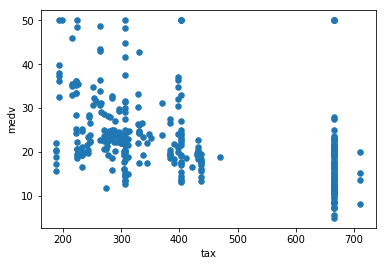

In [39]:
dataset.plot.scatter(x='tax', y='medv', s=30)

In [40]:
dataset['tax'].corr(dataset['medv'])

-0.4391190978088964

from the above plot and the value it shows these two variables have moderate negative correlation between them

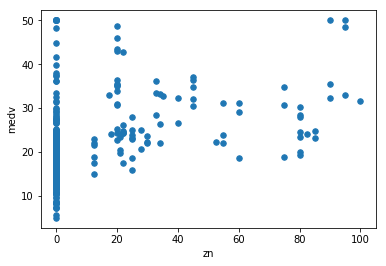

In [41]:
dataset.plot.scatter(x='zn', y='medv', s=30)

In [42]:
dataset['zn'].corr(dataset['medv'])

0.3425471530399738

from the above value and plot it shows that these two variables have moderate positive correlation between them

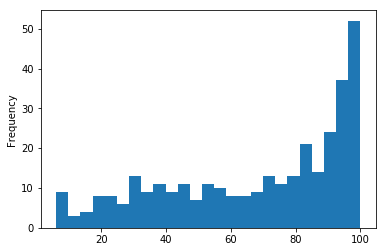

In [43]:
#Age
dataset_train['age'].plot(kind='hist',bins=25)

from the above plot we can see that it is skewed in one side

In [44]:
X = dataset.drop(labels=['medv', 'ID'], axis = 1, inplace=False)

In [45]:
X.head()

age   black  chas     crim     dis  indus  lstat    nox  ptratio  rad  \
0  65.2  396.90     0  0.00632  4.0900   2.31   4.98  0.538     15.3    1   
1  78.9  396.90     0  0.02731  4.9671   7.07   9.14  0.469     17.8    2   
2  45.8  394.63     0  0.03237  6.0622   2.18   2.94  0.458     18.7    3   
3  54.2  396.90     0  0.06905  6.0622   2.18   5.33  0.458     18.7    3   
4  66.6  395.60     0  0.08829  5.5605   7.87  12.43  0.524     15.2    5   

      rm  tax    zn  
0  6.575  296  18.0  
1  6.421  242   0.0  
2  6.998  222   0.0  
3  7.147  222   0.0  
4  6.012  311  12.5

In [46]:
y_train = dataset['medv']

In [47]:
y_train= y_train[:len(dataset_train)]

In [48]:
y_train.shape

(329,)

In [49]:
y_train = y_train.reshape(329,1)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [50]:
dataset.apply(lambda x: len(x.unique()))

ID         502
age        356
black      354
chas         2
crim       500
dis        408
indus       76
lstat      451
medv       192
nox         81
ptratio     46
rad          9
rm         443
tax         66
zn          26
dtype: int64

In [51]:
#split the training and the test set
X_train = X[:len(dataset_train)]

In [52]:
X_test = X[len(dataset_train):]

In [53]:
X_train

age   black  chas      crim     dis  indus  lstat    nox  ptratio  rad  \
0     65.2  396.90     0   0.00632  4.0900   2.31   4.98  0.538     15.3    1   
1     78.9  396.90     0   0.02731  4.9671   7.07   9.14  0.469     17.8    2   
2     45.8  394.63     0   0.03237  6.0622   2.18   2.94  0.458     18.7    3   
3     54.2  396.90     0   0.06905  6.0622   2.18   5.33  0.458     18.7    3   
4     66.6  395.60     0   0.08829  5.5605   7.87  12.43  0.524     15.2    5   
5     94.3  392.52     0   0.22489  6.3467   7.87  20.45  0.524     15.2    5   
6     82.9  396.90     0   0.11747  6.2267   7.87  13.27  0.524     15.2    5   
7     39.0  390.50     0   0.09378  5.4509   7.87  15.71  0.524     15.2    5   
8     61.8  396.90     0   0.62976  4.7075   8.14   8.26  0.538     21.0    4   
9     84.5  380.02     0   0.63796  4.4619   8.14  10.26  0.538     21.0    4   
10    56.5  395.62     0   0.62739  4.4986   8.14   8.47  0.538     21.0    4   
11    29.3  386.85     0   1.05393  4.4986   8.14   6.58  0.538     21.0    4   
12    36.6  288.99     0   0.80271  3.7965   8.14  11.69  0.538     21.0    4   
13    98.1  376.57     0   1.25179  3.7979   8.14  21.02  0.538     21.0    4   
14    89.2  392.53     0   0.85204  4.0123   8.14  13.83  0.538     21.0    4   
15    91.7  396.90     0   1.23247  3.9769   8.14  18.72  0.538     21.0    4   
16   100.0  394.54     0   0.98843  4.0952   8.14  19.88  0.538     21.0    4   
17    88.8  306.38     0   0.95577  4.4534   8.14  17.28  0.538     21.0    4   
18    94.1  360.17     0   1.13081  4.2330   8.14  22.60  0.538     21.0    4   
19   100.0  376.73     0   1.35472  4.1750   8.14  13.04  0.538     21.0    4   
20    96.9  248.31     0   1.61282  3.7598   8.14  20.34  0.538     21.0    4   
21    30.2  393.43     0   0.17505  3.8473   5.96  10.13  0.499     19.2    5   
22    21.8  395.63     0   0.02763  5.4011   2.95   4.32  0.428     18.3    3   
23    15.8  395.62     0   0.03359  5.4011   2.95   1.98  0.428     18.3    3   
24     6.6  383.37     0   0.14150  5.7209   6.91   5.81  0.448     17.9    3   
25     6.5  394.46     0   0.15936  5.7209   6.91   7.44  0.448     17.9    3   
26    40.0  389.39     0   0.12269  5.7209   6.91   9.55  0.448     17.9    3   
27    33.8  396.90     0   0.17142  5.1004   6.91  10.21  0.448     17.9    3   
28    33.3  396.90     0   0.18836  5.1004   6.91  14.15  0.448     17.9    3   
29    85.5  392.74     0   0.22927  5.6894   6.91  18.80  0.448     17.9    3   
..     ...     ...   ...       ...     ...    ...    ...    ...      ...  ...   
299   65.4  396.90     0   7.83932  2.9634  18.10  13.22  0.655     20.2   24   
300   48.2  334.40     0   3.16360  3.0665  18.10  14.13  0.655     20.2   24   
301   84.7   22.01     0   3.77498  2.8715  18.10  17.15  0.655     20.2   24   
302   94.5  331.29     0   4.42228  2.5403  18.10  21.32  0.584     20.2   24   
303   71.0  368.74     0  15.57570  2.9084  18.10  18.13  0.580     20.2   24   
304   56.7  396.90     0  13.07510  2.8237  18.10  14.76  0.580     20.2   24   
305   90.7  395.33     0   4.03841  3.0993  18.10  12.87  0.532     20.2   24   
306   75.0  393.37     0   3.56868  2.8965  18.10  14.36  0.580     20.2   24   
307   95.4  352.58     0   8.05579  2.4298  18.10  18.14  0.584     20.2   24   
308   93.6  396.21     0   4.87141  2.3053  18.10  18.68  0.614     20.2   24   
309   97.3  349.48     0  15.02340  2.1007  18.10  24.91  0.614     20.2   24   
310   96.7  379.70     0  10.23300  2.1705  18.10  18.03  0.614     20.2   24   
311   88.0  383.32     0  14.33370  1.9512  18.10  13.11  0.614     20.2   24   
312   64.7  396.90     0   5.82401  3.4242  18.10  10.74  0.532     20.2   24   
313   74.9  393.07     0   5.70818  3.3317  18.10   7.74  0.532     20.2   24   
314   40.3  392.92     0   2.81838  4.0983  18.10  10.42  0.532     20.2   24   
315   41.9  370.73     0   2.37857  3.7240  18.10  13.34  0.583     20.2   24   
316   79.8  392.68     0   5.69175  3.

In [54]:
X_train.shape

(329, 13)

In [55]:
X_test

age   black  chas      crim     dis  indus  lstat    nox  ptratio  rad  \
329   61.1  392.83     0   0.02729  4.9671   7.07   4.03  0.469     17.8    2   
330   58.7  394.12     0   0.02985  6.0622   2.18   5.21  0.458     18.7    3   
331   96.1  396.90     0   0.14455  5.9505   7.87  19.15  0.524     15.2    5   
332  100.0  386.63     0   0.21124  6.0821   7.87  29.93  0.524     15.2    5   
333   85.9  386.71     0   0.17004  6.5921   7.87  17.10  0.524     15.2    5   
334   81.7  386.75     0   0.78420  4.2579   8.14  14.67  0.538     21.0    4   
335   69.5  390.95     0   0.72580  3.7965   8.14  11.28  0.538     21.0    4   
336   94.1  394.33     0   0.75026  4.3996   8.14  16.30  0.538     21.0    4   
337   85.7  303.42     0   0.84054  4.4546   8.14  16.51  0.538     21.0    4   
338   90.3  376.88     0   0.67191  4.6820   8.14  14.81  0.538     21.0    4   
339   94.4  387.94     0   0.77299  4.4547   8.14  12.80  0.538     21.0    4   
340   87.3  380.23     0   1.00245  4.2390   8.14  11.98  0.538     21.0    4   
341   82.0  232.60     0   1.38799  3.9900   8.14  27.71  0.538     21.0    4   
342   95.0  358.77     0   1.15172  3.7872   8.14  18.35  0.538     21.0    4   
343   68.2  396.90     0   0.06417  3.3603   5.96   9.68  0.499     19.2    5   
344   61.4  377.56     0   0.09744  3.3779   5.96  11.41  0.499     19.2    5   
345   41.5  396.90     0   0.08014  3.9342   5.96   8.77  0.499     19.2    5   
346    2.9  385.41     0   0.12744  5.7209   6.91   4.84  0.448     17.9    3   
347   95.3  396.90     0   0.25387  5.8700   6.91  30.81  0.448     17.9    3   
348   21.1  396.90     0   0.05360  6.8147   5.64   5.28  0.439     16.8    4   
349   47.2  396.90     0   0.10328  6.9320   5.13   9.22  0.453     19.7    8   
350   67.8  396.90     0   0.11027  7.2255   5.13   6.73  0.453     19.7    8   
351   33.0  396.90     0   0.12816  6.4980   6.07   8.79  0.409     18.9    4   
352   17.5  376.94     0   0.15876  5.2873  10.81   9.88  0.413     19.2    4   
353   53.7  386.40     0   0.05646  5.0141  12.83  12.34  0.437     18.7    5   
354   36.6  396.06     0   0.08387  4.5026  12.83   9.10  0.437     18.7    5   
355   32.2  396.90     0   0.03659  5.4007   4.86   6.72  0.426     19.0    4   
356   73.9  393.55     0   0.03932  3.0921   3.41   8.20  0.489     17.8    2   
357   53.6  395.01     0   0.04203  3.6659  15.04   8.16  0.464     18.2    4   
358   57.8  357.98     0   0.12204  3.4952   2.89   6.65  0.445     18.0    2   
..     ...     ...   ...       ...     ...    ...    ...    ...      ...  ...   
472  100.0    2.60     0  51.13580  1.4130  18.10  10.11  0.597     20.2   24   
473  100.0   35.05     0  14.05070  1.5275  18.10  21.22  0.597     20.2   24   
474  100.0   28.79     0  18.81100  1.5539  18.10  34.37  0.597     20.2   24   
475   90.8   21.57     0  10.83420  1.8195  18.10  25.79  0.679     20.2   24   
476  100.0  318.75     0  11.08740  1.8589  18.10  15.02  0.718     20.2   24   
477   95.3  319.98     0   7.02259  1.8746  18.10  15.70  0.718     20.2   24   
478   87.6  291.55     0  12.04820  1.9512  18.10  14.10  0.614     20.2   24   
479   85.1    2.52     0   7.05042  2.0218  18.10  23.29  0.614     20.2   24   
480   59.7   24.65     0  12.24720  1.9976  18.10  15.69  0.584     20.2   24   
481   86.1   83.45     0   8.49213  2.0527  18.10  17.64  0.584     20.2   24   
482   94.6  109.85     0  11.16040  2.1247  18.10  23.27  0.740     20.2   24   
483   93.3   27.49     0  14.42080  2.0026  18.10  18.05  0.740     20.2   24   
484   87.9   68.95     0  13.67810  1.8206  18.10  34.02  0.740     20.2   24   
485   96.4  318.01     0   6.28807  2.0720  18.10  17.79  0.740     20.2   24   
486   98.3  304.21     0   7.52601  2.1850  18.10  19.31  0.713     20.2   24   
487   92.6    0.32     0   6.71772  2.3236  18.10  17.44  0.713     20.2   24   
488   94.1    6.68     0   9.51363  2.4961  18.10  18.71  0.713     20.2   24   
489   87.9   10.48     0   4.66883  2.

In [56]:
X_test.shape

(173, 13)

In [57]:
y_train.shape

(329, 1)

In [58]:
#feature normalising
from sklearn.preprocessing import MinMaxScaler
mms_X = MinMaxScaler()
X_train = mms_X.fit_transform(X_train)
X_test = mms_X.transform(X_test)

# Neural Networks using Keras

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


In [60]:
def build_regressor(optimizer='sgd', kernel_initializer='normal'):
    regressor = Sequential()
    
    #input layer and first hidden layer
    regressor.add(Dense(units=8 , activation='tanh', kernel_initializer=kernel_initializer, input_dim=13))
    
    #output unit
    regressor.add(Dense(units=1, kernel_initializer=kernel_initializer))
    
    #compile
    regressor.compile(optimizer='sgd', loss='mean_squared_error')
    return regressor

regressor_NN = KerasRegressor(build_fn=build_regressor, batch_size=5, epochs=50)

In [61]:
regressor_NN.fit(X_train, y_train)

Epoch 1/50
329/329 [==============================] - 0s 1ms/step - loss: 139.2396
Epoch 2/50
329/329 [==============================] - 0s 209us/step - loss: 66.3659
Epoch 3/50
329/329 [==============================] - 0s 214us/step - loss: 51.4237
Epoch 4/50
329/329 [==============================] - 0s 229us/step - loss: 41.6396
Epoch 5/50
329/329 [==============================] - 0s 209us/step - loss: 35.3083
Epoch 6/50
329/329 [==============================] - 0s 217us/step - loss: 28.9895
Epoch 7/50
329/329 [==============================] - 0s 223us/step - loss: 27.2126
Epoch 8/50
329/329 [==============================] - 0s 220us/step - loss: 23.2763
Epoch 9/50
329/329 [==============================] - 0s 234us/step - loss: 28.3774
Epoch 10/50
329/329 [==============================] - 0s 211us/step - loss: 22.7717
Epoch 11/50
329/329 [==============================] - 0s 200us/step - loss: 20.5991
Epoch 12/50
329/329 [==============================] - 0s 205us/step - loss

In [71]:
print(regressor_NN.score(X_train, y_train))

329/329 [==============================] - 0s 149us/step
-9.861767499823701


# Hyper Parameter Tuning

In [62]:
parameters = [
    {
        'batch_size' : [5, 10],
        'epochs' : [50, 100],
        'optimizer' : ['adam', 'rmsprop'],
        'kernel_initializer' : ['uniform', 'normal']
    }
]

In [63]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=regressor_NN, param_grid=parameters, cv=2, scoring='r2')
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/50
164/164 [==============================] - 0s 1ms/step - loss: 204.8870
Epoch 2/50
164/164 [==============================] - 0s 246us/step - loss: 90.2111
Epoch 3/50
164/164 [==============================] - 0s 225us/step - loss: 75.2955
Epoch 4/50
164/164 [==============================] - 0s 256us/step - loss: 63.8105
Epoch 5/50
164/164 [==============================] - 0s 289us/step - loss: 53.9811
Epoch 6/50
164/164 [==============================] - 0s 246us/step - loss: 46.5528
Epoch 7/50
164/164 [==============================] - 0s 213us/step - loss: 42.7133
Epoch 8/50
164/164 [==============================] - 0s 207us/step - loss: 40.2076
Epoch 9/50
164/164 [==============================] - 0s 219us/step - loss: 40.8395
Epoch 10/50
164/164 [==============================] - 0s 228us/step - loss: 39.2219
Epoch 11/50
164/164 [==============================] - 0s 189us/step - loss: 37.0673
Epoch 12/50
164/164 [==============================] - 0s 234us/step - loss

Epoch 48/50
165/165 [==============================] - 0s 224us/step - loss: 6.6592
Epoch 49/50
165/165 [==============================] - 0s 230us/step - loss: 6.1851
Epoch 50/50
165/165 [==============================] - 0s 227us/step - loss: 6.8331
Epoch 1/50
164/164 [==============================] - 0s 2ms/step - loss: 181.8857
Epoch 2/50
164/164 [==============================] - 0s 268us/step - loss: 92.9090
Epoch 3/50
164/164 [==============================] - 0s 237us/step - loss: 80.0462
Epoch 4/50
164/164 [==============================] - 0s 243us/step - loss: 67.0020
Epoch 5/50
164/164 [==============================] - 0s 240us/step - loss: 62.7492
Epoch 6/50
164/164 [==============================] - 0s 253us/step - loss: 50.5821
Epoch 7/50
164/164 [==============================] - 0s 237us/step - loss: 42.9927
Epoch 8/50
164/164 [==============================] - 0s 280us/step - loss: 37.3352
Epoch 9/50
164/164 [==============================] - 0s 408us/step - loss: 3

Epoch 45/50
165/165 [==============================] - 0s 227us/step - loss: 7.3074
Epoch 46/50
165/165 [==============================] - 0s 224us/step - loss: 5.9976
Epoch 47/50
165/165 [==============================] - 0s 209us/step - loss: 5.9597
Epoch 48/50
165/165 [==============================] - 0s 254us/step - loss: 6.6103
Epoch 49/50
165/165 [==============================] - 0s 272us/step - loss: 5.8904
Epoch 50/50
165/165 [==============================] - 0s 254us/step - loss: 6.3660
Epoch 1/50
164/164 [==============================] - 1s 3ms/step - loss: 189.3735
Epoch 2/50
164/164 [==============================] - 0s 234us/step - loss: 91.3673
Epoch 3/50
164/164 [==============================] - 0s 256us/step - loss: 74.4122
Epoch 4/50
164/164 [==============================] - 0s 277us/step - loss: 67.7969
Epoch 5/50
164/164 [==============================] - 0s 228us/step - loss: 70.9826
Epoch 6/50
164/164 [==============================] - 0s 210us/step - loss: 5

Epoch 42/50
165/165 [==============================] - 0s 233us/step - loss: 6.9542
Epoch 43/50
165/165 [==============================] - 0s 233us/step - loss: 7.1455
Epoch 44/50
165/165 [==============================] - 0s 230us/step - loss: 7.0418
Epoch 45/50
165/165 [==============================] - 0s 254us/step - loss: 7.7860
Epoch 46/50
165/165 [==============================] - 0s 251us/step - loss: 6.4884
Epoch 47/50
165/165 [==============================] - 0s 263us/step - loss: 6.9922
Epoch 48/50
165/165 [==============================] - 0s 239us/step - loss: 6.7557
Epoch 49/50
165/165 [==============================] - 0s 260us/step - loss: 6.5349
Epoch 50/50
165/165 [==============================] - 0s 251us/step - loss: 6.9832
Epoch 1/50
164/164 [==============================] - 0s 2ms/step - loss: 176.3935
Epoch 2/50
164/164 [==============================] - 0s 262us/step - loss: 90.4437
Epoch 3/50
164/164 [==============================] - 0s 256us/step - loss: 6

Epoch 39/50
165/165 [==============================] - 0s 248us/step - loss: 7.8859
Epoch 40/50
165/165 [==============================] - 0s 257us/step - loss: 7.1440
Epoch 41/50
165/165 [==============================] - 0s 242us/step - loss: 7.3424
Epoch 42/50
165/165 [==============================] - 0s 254us/step - loss: 7.5678
Epoch 43/50
165/165 [==============================] - 0s 251us/step - loss: 6.8745
Epoch 44/50
165/165 [==============================] - 0s 251us/step - loss: 6.1472
Epoch 45/50
165/165 [==============================] - 0s 239us/step - loss: 6.5156
Epoch 46/50
165/165 [==============================] - 0s 263us/step - loss: 7.3326
Epoch 47/50
165/165 [==============================] - 0s 263us/step - loss: 7.5700
Epoch 48/50
165/165 [==============================] - 0s 242us/step - loss: 6.1084
Epoch 49/50
165/165 [==============================] - 0s 260us/step - loss: 7.0574
Epoch 50/50
165/165 [==============================] - 0s 263us/step - loss:

165/165 [==============================] - 0s 242us/step - loss: 6.3666
Epoch 81/100
165/165 [==============================] - 0s 227us/step - loss: 5.7982
Epoch 82/100
165/165 [==============================] - 0s 239us/step - loss: 6.2322
Epoch 83/100
165/165 [==============================] - 0s 236us/step - loss: 6.1115
Epoch 84/100
165/165 [==============================] - 0s 230us/step - loss: 5.1054
Epoch 85/100
165/165 [==============================] - 0s 221us/step - loss: 5.4196
Epoch 86/100
165/165 [==============================] - 0s 245us/step - loss: 6.1100
Epoch 87/100
165/165 [==============================] - 0s 206us/step - loss: 5.8490
Epoch 88/100
165/165 [==============================] - 0s 233us/step - loss: 5.6967
Epoch 89/100
165/165 [==============================] - 0s 230us/step - loss: 5.7157
Epoch 90/100
165/165 [==============================] - 0s 224us/step - loss: 5.4200
Epoch 91/100
165/165 [==============================] - 0s 242us/step - loss: 

165/165 [==============================] - 0s 224us/step - loss: 6.4556
Epoch 72/100
165/165 [==============================] - 0s 315us/step - loss: 6.1415
Epoch 73/100
165/165 [==============================] - 0s 269us/step - loss: 6.3441
Epoch 74/100
165/165 [==============================] - 0s 263us/step - loss: 6.4758
Epoch 75/100
165/165 [==============================] - 0s 224us/step - loss: 6.1956
Epoch 76/100
165/165 [==============================] - 0s 224us/step - loss: 6.5303
Epoch 77/100
165/165 [==============================] - 0s 224us/step - loss: 6.6397
Epoch 78/100
165/165 [==============================] - 0s 218us/step - loss: 6.5458
Epoch 79/100
165/165 [==============================] - 0s 281us/step - loss: 5.8550
Epoch 80/100
165/165 [==============================] - 0s 284us/step - loss: 6.5274
Epoch 81/100
165/165 [==============================] - 0s 209us/step - loss: 6.5086
Epoch 82/100
165/165 [==============================] - 0s 212us/step - loss: 

165/165 [==============================] - 0s 230us/step - loss: 5.9055
Epoch 63/100
165/165 [==============================] - 0s 251us/step - loss: 5.4646
Epoch 64/100
165/165 [==============================] - 0s 272us/step - loss: 6.5727
Epoch 65/100
165/165 [==============================] - 0s 266us/step - loss: 6.2318
Epoch 66/100
165/165 [==============================] - 0s 227us/step - loss: 6.6576
Epoch 67/100
165/165 [==============================] - 0s 263us/step - loss: 6.0838
Epoch 68/100
165/165 [==============================] - 0s 233us/step - loss: 5.9600
Epoch 69/100
165/165 [==============================] - 0s 221us/step - loss: 6.0739
Epoch 70/100
165/165 [==============================] - 0s 218us/step - loss: 6.7157
Epoch 71/100
165/165 [==============================] - 0s 233us/step - loss: 5.9404
Epoch 72/100
165/165 [==============================] - 0s 215us/step - loss: 5.9523
Epoch 73/100
165/165 [==============================] - 0s 239us/step - loss: 

Epoch 58/100
164/164 [==============================] - 0s 231us/step - loss: 15.1412
Epoch 59/100
164/164 [==============================] - 0s 222us/step - loss: 14.8697
Epoch 60/100
164/164 [==============================] - 0s 222us/step - loss: 15.5886
Epoch 61/100
164/164 [==============================] - 0s 234us/step - loss: 11.4653
Epoch 62/100
164/164 [==============================] - 0s 213us/step - loss: 15.8250
Epoch 63/100
164/164 [==============================] - 0s 228us/step - loss: 14.6968
Epoch 64/100
164/164 [==============================] - 0s 216us/step - loss: 15.0811
Epoch 65/100
164/164 [==============================] - 0s 222us/step - loss: 17.0567
Epoch 66/100
164/164 [==============================] - 0s 216us/step - loss: 12.1166
Epoch 67/100
164/164 [==============================] - 0s 234us/step - loss: 13.4458
Epoch 68/100
164/164 [==============================] - 0s 207us/step - loss: 11.1779
Epoch 69/100
164/164 [==============================] 

164/164 [==============================] - 0s 173us/step - loss: 25.8751
Epoch 50/50
164/164 [==============================] - 0s 146us/step - loss: 18.2061
Epoch 1/50
165/165 [==============================] - 1s 5ms/step - loss: 328.9418
Epoch 2/50
165/165 [==============================] - 0s 157us/step - loss: 71.5608
Epoch 3/50
165/165 [==============================] - 0s 145us/step - loss: 72.6927
Epoch 4/50
165/165 [==============================] - 0s 142us/step - loss: 72.1564
Epoch 5/50
165/165 [==============================] - 0s 133us/step - loss: 71.1385
Epoch 6/50
165/165 [==============================] - 0s 139us/step - loss: 67.3464
Epoch 7/50
165/165 [==============================] - 0s 136us/step - loss: 54.6221
Epoch 8/50
165/165 [==============================] - 0s 145us/step - loss: 43.4946
Epoch 9/50
165/165 [==============================] - 0s 136us/step - loss: 37.8403
Epoch 10/50
165/165 [==============================] - 0s 185us/step - loss: 32.2657
Ep

Epoch 46/50
164/164 [==============================] - 0s 143us/step - loss: 18.6188
Epoch 47/50
164/164 [==============================] - 0s 146us/step - loss: 22.4847
Epoch 48/50
164/164 [==============================] - 0s 134us/step - loss: 19.5075
Epoch 49/50
164/164 [==============================] - 0s 207us/step - loss: 20.4443
Epoch 50/50
164/164 [==============================] - 0s 155us/step - loss: 19.1130
Epoch 1/50
165/165 [==============================] - 1s 3ms/step - loss: 349.4814
Epoch 2/50
165/165 [==============================] - 0s 197us/step - loss: 73.3037
Epoch 3/50
165/165 [==============================] - 0s 185us/step - loss: 71.5073
Epoch 4/50
165/165 [==============================] - 0s 178us/step - loss: 72.5243
Epoch 5/50
165/165 [==============================] - 0s 163us/step - loss: 68.5921
Epoch 6/50
165/165 [==============================] - 0s 151us/step - loss: 65.3559
Epoch 7/50
165/165 [==============================] - 0s 154us/step - lo

Epoch 43/50
164/164 [==============================] - 0s 155us/step - loss: 23.4013
Epoch 44/50
164/164 [==============================] - 0s 164us/step - loss: 30.5387
Epoch 45/50
164/164 [==============================] - 0s 170us/step - loss: 20.8191
Epoch 46/50
164/164 [==============================] - 0s 192us/step - loss: 18.8537
Epoch 47/50
164/164 [==============================] - 0s 198us/step - loss: 17.8824
Epoch 48/50
164/164 [==============================] - 0s 173us/step - loss: 21.3302
Epoch 49/50
164/164 [==============================] - 0s 192us/step - loss: 19.1240
Epoch 50/50
164/164 [==============================] - 0s 198us/step - loss: 18.9795
Epoch 1/50
165/165 [==============================] - 1s 5ms/step - loss: 309.7095
Epoch 2/50
165/165 [==============================] - 0s 142us/step - loss: 74.8726
Epoch 3/50
165/165 [==============================] - 0s 145us/step - loss: 72.4414
Epoch 4/50
165/165 [==============================] - 0s 148us/step -

164/164 [==============================] - 0s 137us/step - loss: 23.3823
Epoch 36/100
164/164 [==============================] - 0s 137us/step - loss: 21.3374
Epoch 37/100
164/164 [==============================] - 0s 173us/step - loss: 25.5252
Epoch 38/100
164/164 [==============================] - 0s 155us/step - loss: 26.2582
Epoch 39/100
164/164 [==============================] - 0s 152us/step - loss: 22.5090
Epoch 40/100
164/164 [==============================] - 0s 146us/step - loss: 17.1628
Epoch 41/100
164/164 [==============================] - 0s 167us/step - loss: 20.2772
Epoch 42/100
164/164 [==============================] - 0s 149us/step - loss: 18.8205
Epoch 43/100
164/164 [==============================] - 0s 167us/step - loss: 19.2733
Epoch 44/100
164/164 [==============================] - 0s 173us/step - loss: 15.1649
Epoch 45/100
164/164 [==============================] - 0s 152us/step - loss: 20.2718
Epoch 46/100
164/164 [==============================] - 0s 176us/st

165/165 [==============================] - 0s 172us/step - loss: 8.1061
Epoch 31/100
165/165 [==============================] - 0s 181us/step - loss: 9.2008
Epoch 32/100
165/165 [==============================] - 0s 166us/step - loss: 7.4235
Epoch 33/100
165/165 [==============================] - 0s 169us/step - loss: 7.3722
Epoch 34/100
165/165 [==============================] - 0s 172us/step - loss: 9.0857
Epoch 35/100
165/165 [==============================] - 0s 154us/step - loss: 9.2319
Epoch 36/100
165/165 [==============================] - 0s 163us/step - loss: 7.9202
Epoch 37/100
165/165 [==============================] - 0s 160us/step - loss: 8.3240
Epoch 38/100
165/165 [==============================] - 0s 142us/step - loss: 8.1496
Epoch 39/100
165/165 [==============================] - 0s 160us/step - loss: 6.6725
Epoch 40/100
165/165 [==============================] - 0s 157us/step - loss: 8.9443
Epoch 41/100
165/165 [==============================] - 0s 157us/step - loss: 

165/165 [==============================] - 0s 160us/step - loss: 9.0522
Epoch 22/100
165/165 [==============================] - 0s 151us/step - loss: 10.2590
Epoch 23/100
165/165 [==============================] - 0s 166us/step - loss: 11.6861
Epoch 24/100
165/165 [==============================] - 0s 178us/step - loss: 10.0377
Epoch 25/100
165/165 [==============================] - 0s 154us/step - loss: 10.7512
Epoch 26/100
165/165 [==============================] - 0s 142us/step - loss: 9.0537
Epoch 27/100
165/165 [==============================] - 0s 169us/step - loss: 8.2483
Epoch 28/100
165/165 [==============================] - 0s 160us/step - loss: 8.6900
Epoch 29/100
165/165 [==============================] - 0s 160us/step - loss: 7.9413
Epoch 30/100
165/165 [==============================] - 0s 160us/step - loss: 7.7759
Epoch 31/100
165/165 [==============================] - 0s 218us/step - loss: 7.8633
Epoch 32/100
165/165 [==============================] - 0s 221us/step - lo

165/165 [==============================] - 0s 154us/step - loss: 18.2832
Epoch 13/100
165/165 [==============================] - 0s 151us/step - loss: 16.4496
Epoch 14/100
165/165 [==============================] - 0s 163us/step - loss: 16.3707
Epoch 15/100
165/165 [==============================] - 0s 178us/step - loss: 21.7708
Epoch 16/100
165/165 [==============================] - 0s 154us/step - loss: 15.7194
Epoch 17/100
165/165 [==============================] - 0s 157us/step - loss: 11.9267
Epoch 18/100
165/165 [==============================] - 0s 160us/step - loss: 13.1565
Epoch 19/100
165/165 [==============================] - 0s 175us/step - loss: 21.1112
Epoch 20/100
165/165 [==============================] - 0s 169us/step - loss: 15.7750
Epoch 21/100
165/165 [==============================] - 0s 163us/step - loss: 10.9853
Epoch 22/100
165/165 [==============================] - 0s 169us/step - loss: 9.8339
Epoch 23/100
165/165 [==============================] - 0s 169us/ste

165/165 [==============================] - 0s 181us/step - loss: 72.9665
Epoch 4/100
165/165 [==============================] - 0s 203us/step - loss: 71.6783
Epoch 5/100
165/165 [==============================] - 0s 157us/step - loss: 70.6081
Epoch 6/100
165/165 [==============================] - 0s 148us/step - loss: 70.4982
Epoch 7/100
165/165 [==============================] - 0s 178us/step - loss: 55.7528
Epoch 8/100
165/165 [==============================] - 0s 160us/step - loss: 45.1082
Epoch 9/100
165/165 [==============================] - 0s 145us/step - loss: 39.6338
Epoch 10/100
165/165 [==============================] - 0s 151us/step - loss: 32.6757
Epoch 11/100
165/165 [==============================] - 0s 163us/step - loss: 30.9898
Epoch 12/100
165/165 [==============================] - 0s 166us/step - loss: 23.0014
Epoch 13/100
165/165 [==============================] - 0s 154us/step - loss: 21.2624
Epoch 14/100
165/165 [==============================] - 0s 157us/step - l

In [64]:
print(grid_search.best_score_)

0.6930280169243833


In [65]:
print(grid_search.best_params_)

{'batch_size': 5, 'epochs': 50, 'kernel_initializer': 'uniform', 'optimizer': 'rmsprop'}


# That's the end of the code